In [1]:
# Sentiment Analysis program that parses the tweets from Twitter.

In [2]:
#Libraries
import tweepy
from textblob import TextBlob #for sentiment analysis
import pandas as pd
import matplotlib.pyplot as plt
import re #to work with string data
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [3]:
#Import the Twitter APT
APIKey="1BbDH8pONUrBxUxmLXAPxXapZ"
APISecretKey="3qPqCBpTxohHQYlX0HlNTJcixd2fvd2FQkGnbQKdkJiWUFPJfw"
AccessToken="1379319975006007298-yxyTrc3pl3vZenoXQJyRXQyNLVeOuO"
AccessTokenSecret="z0bMcojmINMAJferAkGHMn5ZBvaJOJYHbzltdTriaSoaP"

In [5]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(APIKey,APISecretKey)
authenticate.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(authenticate)

In [6]:
posts = api.user_timeline(screen_name = 'Technology', cout = 100, lang = 'eg', tweet_mode = 'extended')
i = 1
for tweet in posts[ :20:]: # Top 20 tweets in 100 tweets
  print(str(i) +') ' + tweet.full_text + '\n')
  i+=1

1) Marty Chavez Takes On a Top Role at Alan Waxman’s Sixth Street https://t.co/P2XQLpk2wQ

2) Kroger is diving into drone delivery, starting a pilot at a store near its Cincinnati headquarters https://t.co/MQYJR9K9Qo

3) RT @crypto: WATCH: #Bitcoin’s domination of total #cryptocurrency market value is declining. That’s because momentum for #Ether and other t…

4) RT @crypto: Ether hits $3,000 for the first time as #Bitcoin’s #crypto dominance declines https://t.co/cyRR6dYvPF 

More on @crypto: https:…

5) Francisco Partners, TPG agree to buy Dell’s Boomi for $4 billion https://t.co/kVBOBA7kEI

6) Dell is close to selling its Boomi cloud business to private-equity firms Francisco Partners and TPG in a deal that values the platform at $4 billion including debt, Dow Jones reported, citing people familiar https://t.co/QoHQ0hrlBb

7) Verizon is nearing an agreement to sell its media division to Apollo Global Management, sources say https://t.co/n9paRvy9H5

8) Intel plans to reduce its focus

In [7]:
# Create a DataFrame with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts],columns = ['Tweets'])
df

,Tweets
0,Marty Chavez Takes On a Top Role at Alan Waxma...
1,"Kroger is diving into drone delivery, starting..."
2,RT @crypto: WATCH: #Bitcoin’s domination of to...
3,"RT @crypto: Ether hits $3,000 for the first ti..."
4,"Francisco Partners, TPG agree to buy Dell’s Bo..."
5,Dell is close to selling its Boomi cloud busin...
6,Verizon is nearing an agreement to sell its me...
7,Intel plans to reduce its focus on share repur...
8,A social media post by China’s top law enforce...
9,Elon Musk’s SpaceX returned four astronauts to...


In [9]:
# Cleaning the data by making a function
def cleanText(text):
  text = re.sub('@[AaZa-z0-9]+','',text) #reming mentions
  text = re.sub("#",'',text)  #removing #
  text = re.sub('Rt[\s]+','',text)  #removing Retweets
  tezt = re.sub('https?:\/\/\S+','',text)  #removing links
  return text

In [10]:
# applying the function to clean tweets
df['Tweets'] = df['Tweets'].apply(cleanText)

In [11]:
df

,Tweets
0,Marty Chavez Takes On a Top Role at Alan Waxma...
1,"Kroger is diving into drone delivery, starting..."
2,RT : WATCH: Bitcoin’s domination of total cryp...
3,"RT : Ether hits $3,000 for the first time as B..."
4,"Francisco Partners, TPG agree to buy Dell’s Bo..."
5,Dell is close to selling its Boomi cloud busin...
6,Verizon is nearing an agreement to sell its me...
7,Intel plans to reduce its focus on share repur...
8,A social media post by China’s top law enforce...
9,Elon Musk’s SpaceX returned four astronauts to...


In [12]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity of all the tweets
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# creating 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [13]:
df

,Tweets,Subjectivity,Polarity
0,Marty Chavez Takes On a Top Role at Alan Waxma...,0.500000,0.500000
1,"Kroger is diving into drone delivery, starting...",0.250000,0.050000
2,RT : WATCH: Bitcoin’s domination of total cryp...,0.562500,-0.062500
3,"RT : Ether hits $3,000 for the first time as B...",0.416667,0.375000
4,"Francisco Partners, TPG agree to buy Dell’s Bo...",0.000000,0.000000
5,Dell is close to selling its Boomi cloud busin...,0.500000,0.375000
6,Verizon is nearing an agreement to sell its me...,0.000000,0.000000
7,Intel plans to reduce its focus on share repur...,0.454545,0.136364
8,A social media post by China’s top law enforce...,0.629167,0.070833
9,Elon Musk’s SpaceX returned four astronauts to...,0.136752,0.083333


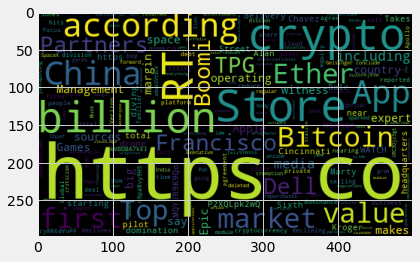

In [14]:
# Word Cloud Visualization
allwords = ' '.join([i for i in df['Tweets']])
Cloud = WordCloud(width = 500, height = 300, random_state = 0, max_font_size = 100).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [15]:
# create a funtion to compute negative, neutral and positive 

def gteAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(gteAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Marty Chavez Takes On a Top Role at Alan Waxma...,0.500000,0.500000,Positive
1,"Kroger is diving into drone delivery, starting...",0.250000,0.050000,Positive
2,RT : WATCH: Bitcoin’s domination of total cryp...,0.562500,-0.062500,Negative
3,"RT : Ether hits $3,000 for the first time as B...",0.416667,0.375000,Positive
4,"Francisco Partners, TPG agree to buy Dell’s Bo...",0.000000,0.000000,Neutral
5,Dell is close to selling its Boomi cloud busin...,0.500000,0.375000,Positive
6,Verizon is nearing an agreement to sell its me...,0.000000,0.000000,Neutral
7,Intel plans to reduce its focus on share repur...,0.454545,0.136364,Positive
8,A social media post by China’s top law enforce...,0.629167,0.070833,Positive
9,Elon Musk’s SpaceX returned four astronauts to...,0.136752,0.083333,Positive


In [16]:
df['Analysis'].value_counts()

Positive    13
Neutral      4
Negative     3
Name: Analysis, dtype: int64

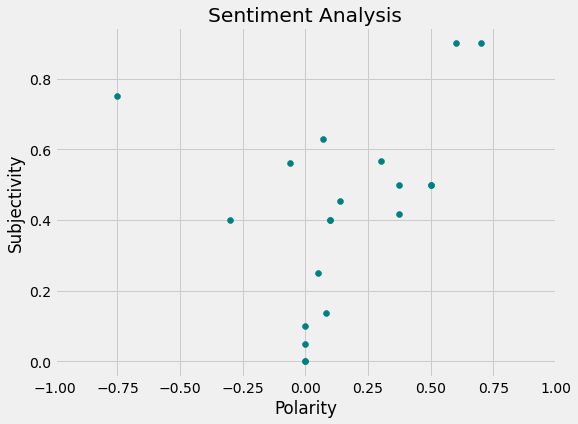

In [18]:
# plotting the scatter plot
plt.figure(figsize = (8,6))

for i in range (0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color = 'Teal')

plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [19]:
# we are able to see only three nuetral analysis because thry are overlapping
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
4,"Francisco Partners, TPG agree to buy Dell’s Bo...",0.00,0.0,Neutral
6,Verizon is nearing an agreement to sell its me...,0.00,0.0,Neutral
17,Quarantine boredom drives demand for renting i...,0.10,0.0,Neutral
19,"""Coinbase could be the next AOL.""\n\nEstimize ...",0.05,0.0,Neutral


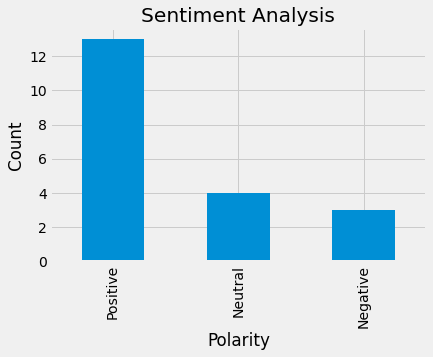

In [20]:
# bar graphs

df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()